In [1]:
%load_ext autoreload
%autoreload 2
import warnings
import numpy as np
import time
import os
from dotenv import load_dotenv
os.environ["USE_PYGEOS"] = "0"
import napari_sparrow as nas
from spatialdata import read_zarr
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from random import sample 
import scanpy as sc
import seaborn as sns
import anndata as ad
import squidpy as sq
%run own_and_modified_functions.ipynb
warnings.simplefilter(action='ignore')

the value of the environment variable BASIC_DCT_BACKEND is not in ["JAX","SCIPY"]


In [2]:
OUTPUT_DIR = '/home/wout/Documents/Thesis_lokaal/Mouse_Liver_Resolve_Data/'
anndata_objects = []
name_anndata = "A1-1"+"/"+"anndataNucA11"
anndata = sc.read(OUTPUT_DIR + '/' + name_anndata + '_all_0threshold')
anndata_objects.append(anndata)
name_anndata = "A1-2"+"/"+"anndataNucA12"
anndata = sc.read(OUTPUT_DIR + '/' + name_anndata + '_all_0threshold')
anndata_objects.append(anndata)
name_anndata = "C2"+"/"+"anndataNucC2"
anndata = sc.read(OUTPUT_DIR + '/' + name_anndata + '_all_0threshold')
anndata_objects.append(anndata)
name_anndata = "D2-1"+"/"+"anndataNucD21"
anndata = sc.read(OUTPUT_DIR + '/' + name_anndata + '_all_0threshold')
anndata_objects.append(anndata)
name_anndata = "PS"+"/"+"ps_slice"
anndata = sc.read(OUTPUT_DIR + '/' + name_anndata + '_all_0threshold')
anndata_objects.append(anndata)
samples = ["A1-1", "A1-2", "C2", "D2-1", "PS"]

In [3]:
annotation1 = 'annotation_own_score_genes_BasicMartin_12'
annotation2 = 'annotation_score_genes_original_BasicMartin_12'

In [7]:
anndata = anndata_objects[1]
# get proportions of anndata.obs[annotation1]
anndata.obs[annotation1].value_counts(normalize=True)*100

Hepa       58.263370
Endo       15.698677
Strom       8.487637
Kupf        6.785509
Unknown     6.244968
Oth im      2.081656
Chol        1.345601
B cell      1.092582
Name: annotation_own_score_genes_Atlas_Scores_7, dtype: float64

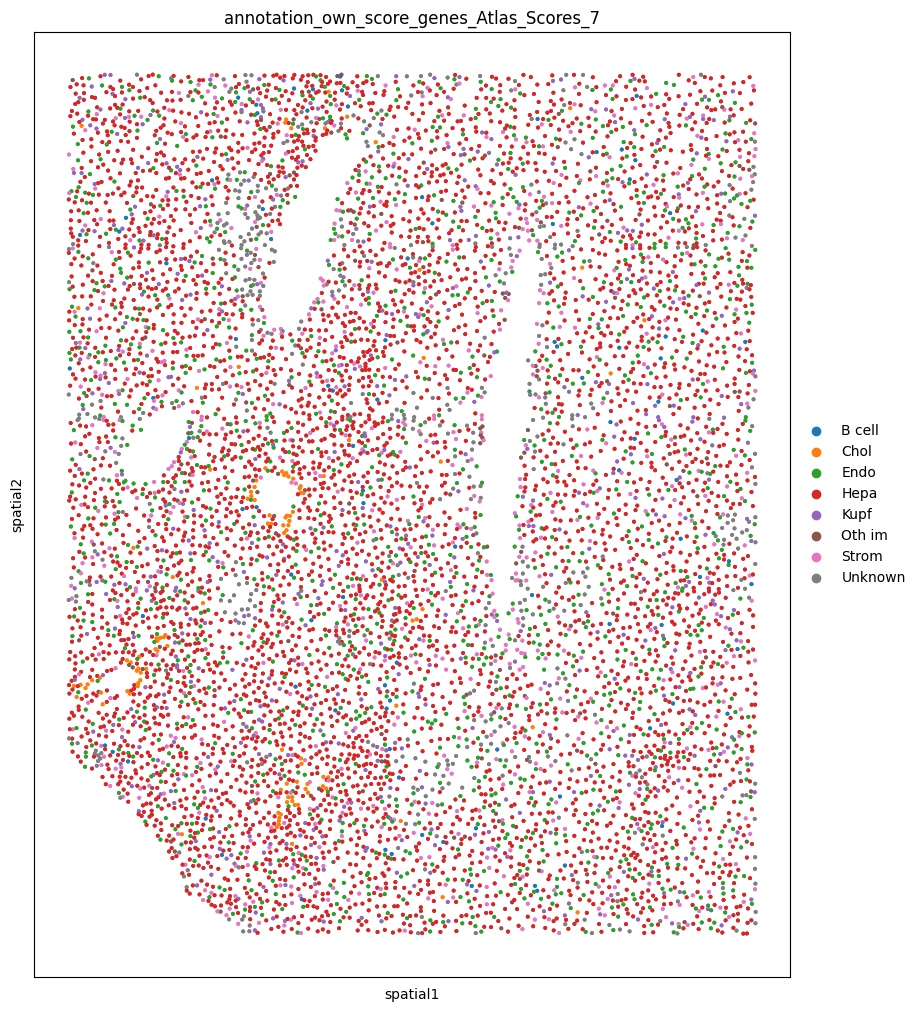

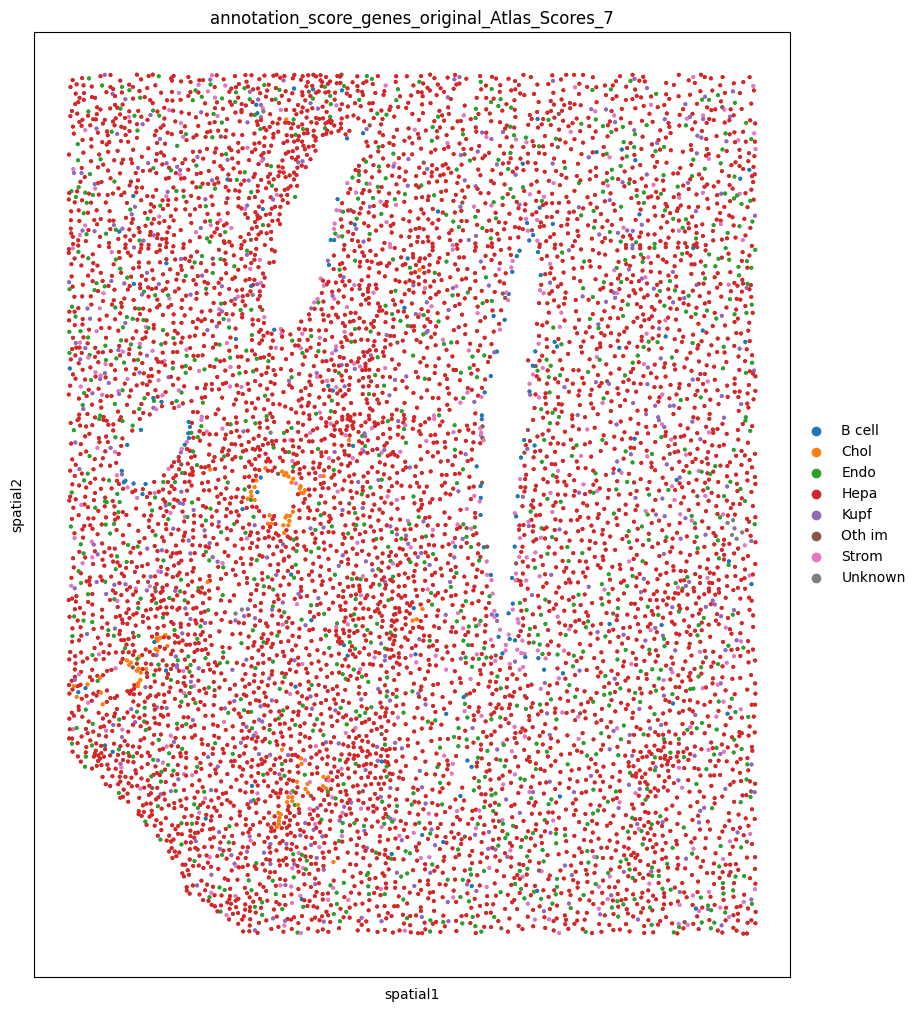

In [5]:
anndata = anndata_objects[1]
sq.pl.spatial_scatter(anndata,color=annotation1,shape=None, figsize=(10, 10)) 
sq.pl.spatial_scatter(anndata,color=annotation2,shape=None, figsize=(10, 10)) 

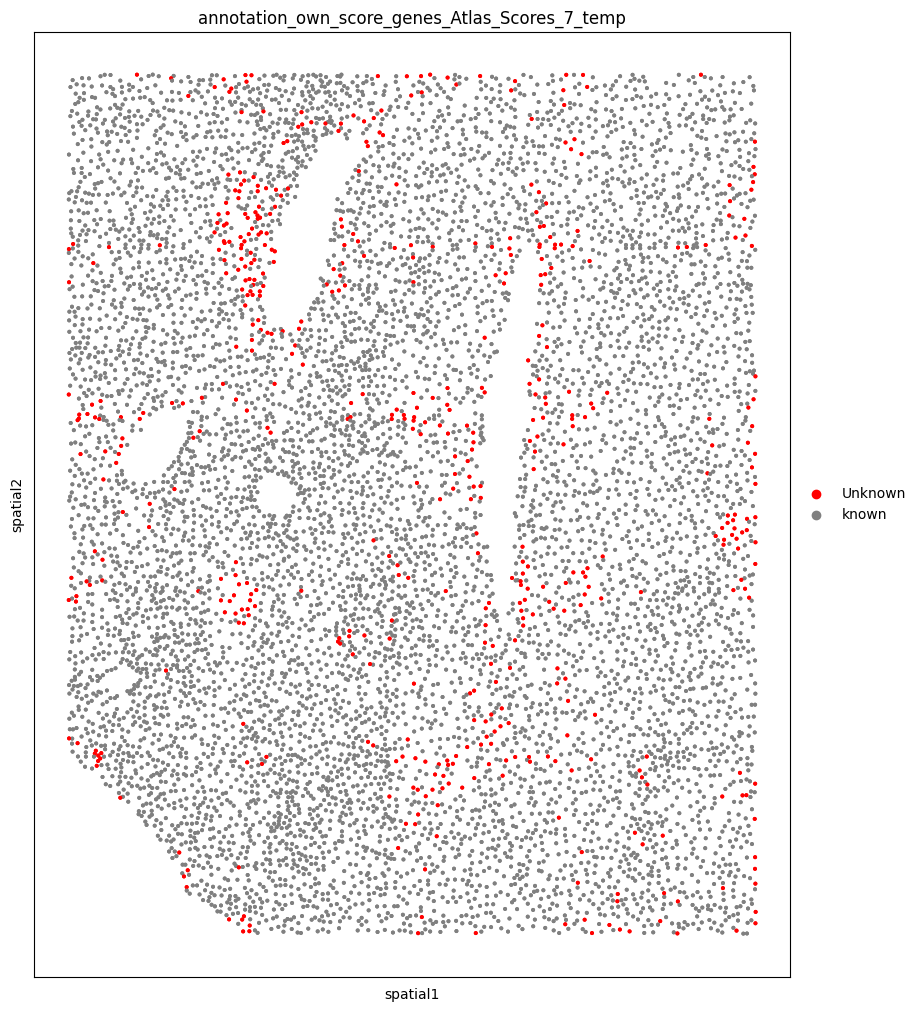

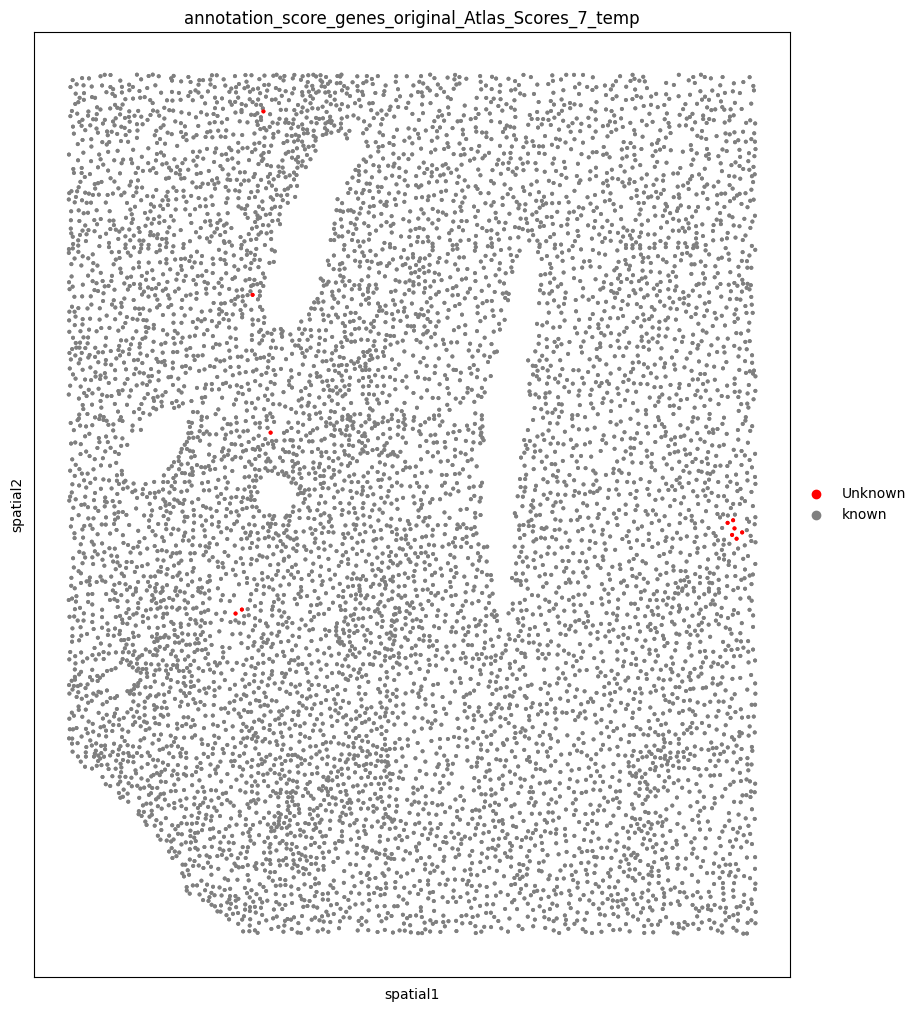

In [10]:
anndata = anndata_objects[1]
anndata.obs[annotation1+'_temp'] = anndata.obs[annotation1]
anndata.obs[annotation2+'_temp'] = anndata.obs[annotation2]
anndata.obs[annotation1+'_temp'] = anndata.obs[annotation1+'_temp'].apply(lambda x: x if x == 'Unknown' else 'known')
anndata.obs[annotation2+'_temp'] = anndata.obs[annotation2+'_temp'].apply(lambda x: x if x == 'Unknown' else 'known')
anndata.uns[annotation1+'_temp_colors'] = ['#FF0000', '#808080']
anndata.uns[annotation2+'_temp_colors'] = ['#FF0000', '#808080']
sq.pl.spatial_scatter(anndata,color=annotation1+'_temp',shape=None, figsize=(10, 10)) 
sq.pl.spatial_scatter(anndata,color=annotation2+'_temp',shape=None, figsize=(10, 10)) 

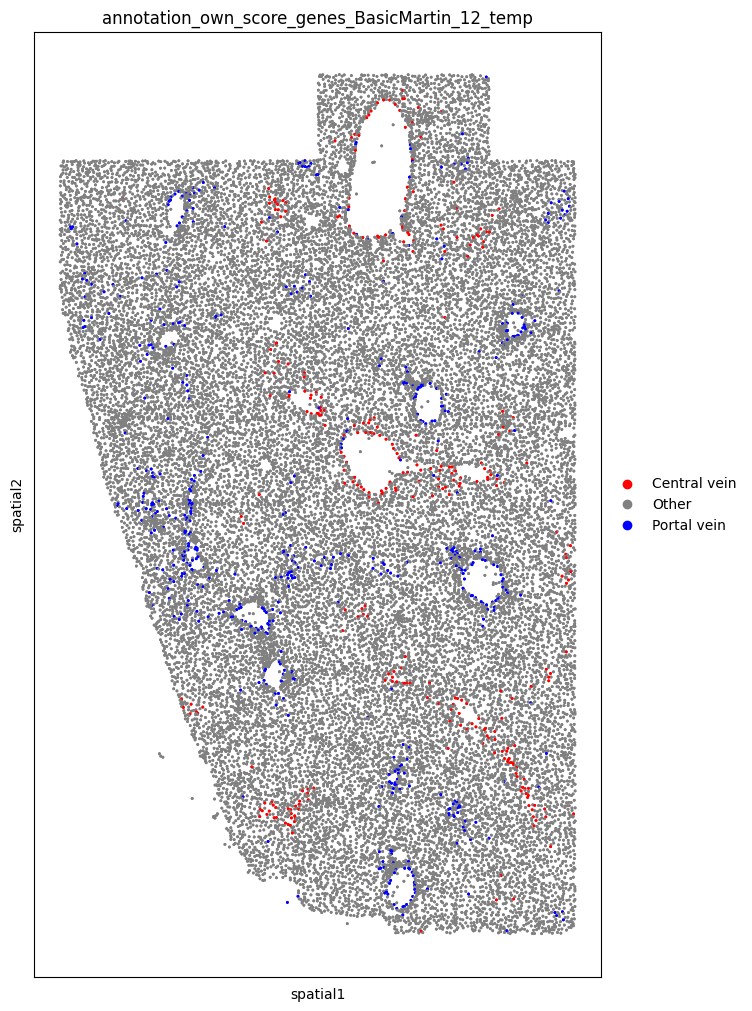

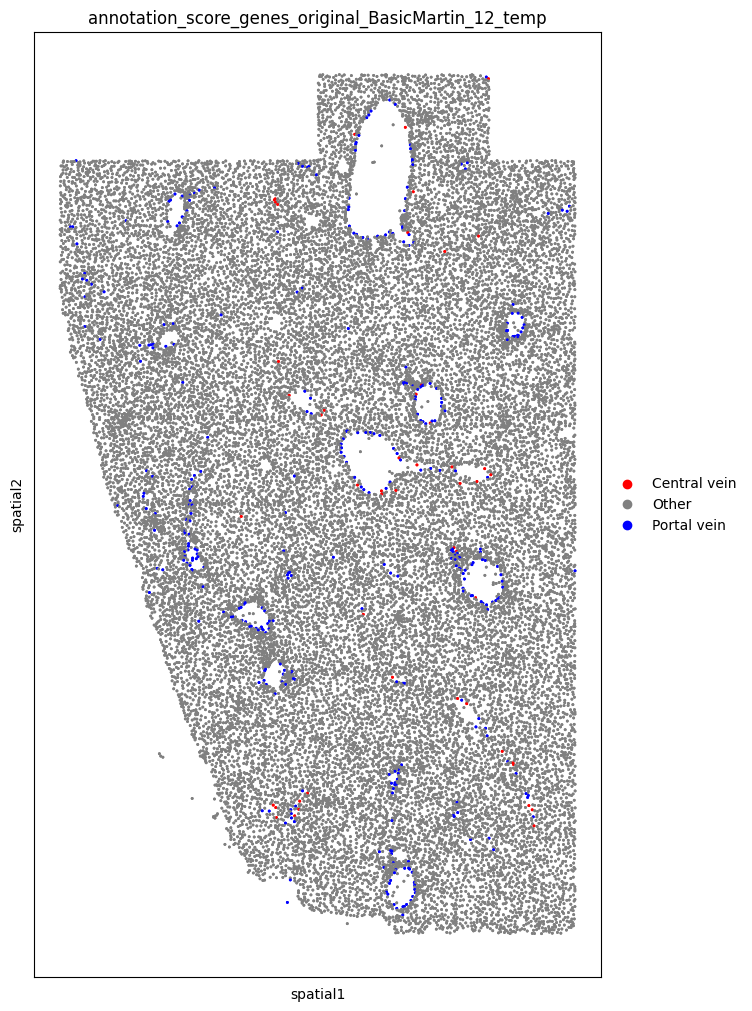

In [39]:
anndata = anndata_objects[2]
anndata.obs[annotation1+'_temp'] = anndata.obs[annotation1]
anndata.obs[annotation2+'_temp'] = anndata.obs[annotation2]
#if not 'Central vein' or 'Portal vein' then 'noChol'
anndata.obs[annotation1+'_temp'] = anndata.obs[annotation1+'_temp'].apply(lambda x: x if x == 'Central vein' or x == 'Portal vein' else 'Other')
anndata.obs[annotation2+'_temp'] = anndata.obs[annotation2+'_temp'].apply(lambda x: x if x == 'Central vein' or x == 'Portal vein' else 'Other')
anndata.uns[annotation1+'_temp_colors'] = ['#FF0000','#808080','#0000FF']
anndata.uns[annotation2+'_temp_colors'] = ['#FF0000','#808080','#0000FF']
sq.pl.spatial_scatter(anndata,color=annotation1+'_temp',shape=None, figsize=(10, 10)) 
sq.pl.spatial_scatter(anndata,color=annotation2+'_temp',shape=None, figsize=(10, 10))

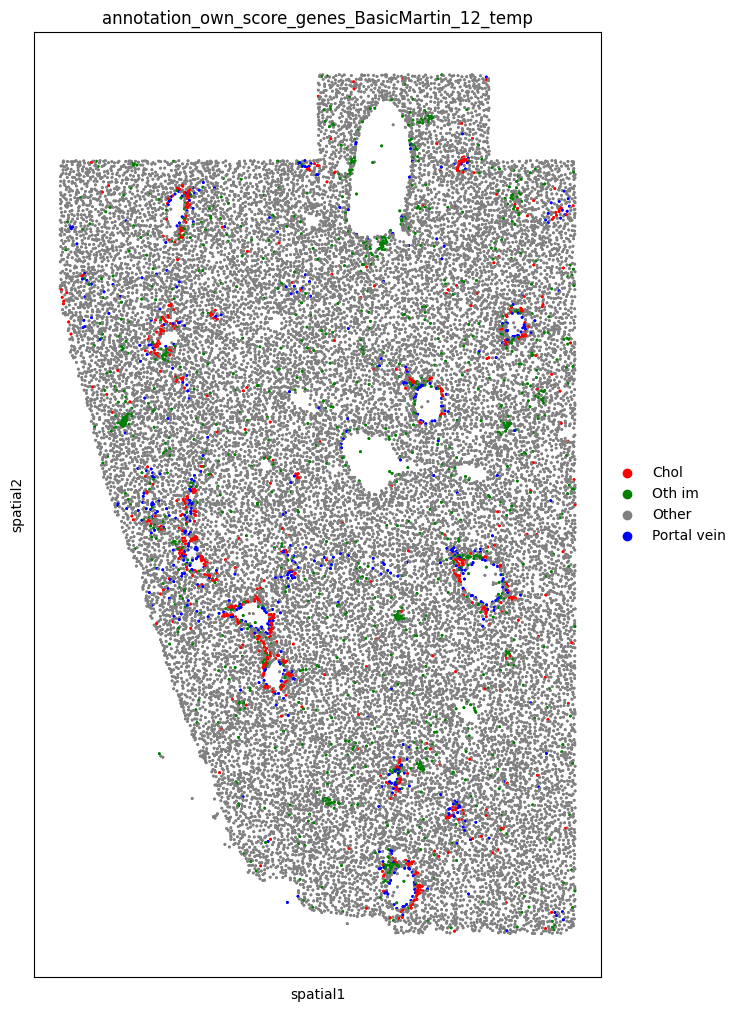

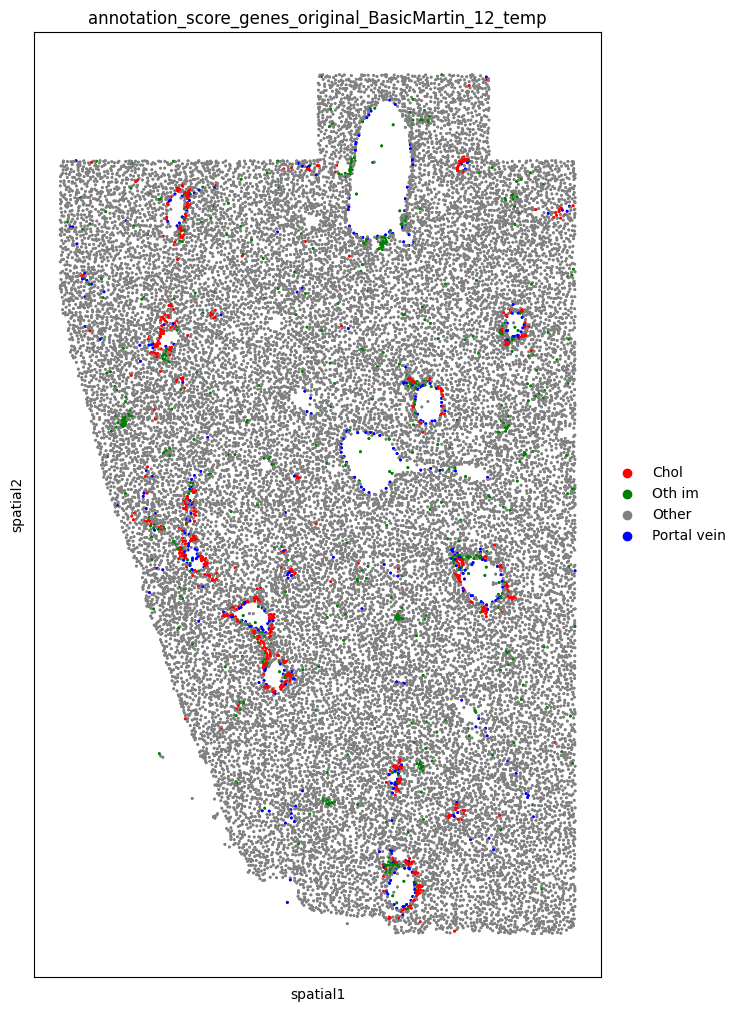

In [46]:
anndata = anndata_objects[2]
anndata.obs[annotation1+'_temp'] = anndata.obs[annotation1]
anndata.obs[annotation2+'_temp'] = anndata.obs[annotation2]
#if not 'Central vein' or 'Portal vein' then 'noChol'
anndata.obs[annotation1+'_temp'] = anndata.obs[annotation1+'_temp'].apply(lambda x: x if x == 'Portal vein' or x == 'Oth im' or x == 'Chol' else 'Other')
anndata.obs[annotation2+'_temp'] = anndata.obs[annotation2+'_temp'].apply(lambda x: x if x == 'Portal vein' or x == 'Oth im' or x == 'Chol' else 'Other')
anndata.uns[annotation1+'_temp_colors'] = ['#FF0000','#008000','#808080','#0000FF']
anndata.uns[annotation2+'_temp_colors'] = ['#FF0000','#008000','#808080','#0000FF']
sq.pl.spatial_scatter(anndata,color=annotation1+'_temp',shape=None, figsize=(10, 10)) 
sq.pl.spatial_scatter(anndata,color=annotation2+'_temp',shape=None, figsize=(10, 10))  

In [ ]:
anndata = anndata_objects[1]
l1 = anndata.obs[annotation1].to_list()
l2 = anndata.obs[annotation2]
# Compare 
diff = l1 == l2
# count the number of True and False
print(100*diff.value_counts()/len(diff))
# set False to 'Different' and True to 'Same'
diff = diff.apply(lambda x: 'Different' if x == False else 'Same')
anndata.obs['diff'] = diff
anndata.uns['diff'+'_colors'] = ['#FF0000','#808080']
sq.pl.spatial_scatter(anndata,color='diff',shape=None, figsize=(10, 10)) 

In [6]:
anno1_co_ocs = []
anno2_co_ocs = []
diff_co_ocs = []

A1-1


  0%|          | 0/1000 [00:00<?, ?/s]

  0%|          | 0/1000 [00:00<?, ?/s]

['Unknown']
A1-2


  0%|          | 0/1000 [00:00<?, ?/s]

  0%|          | 0/1000 [00:00<?, ?/s]

['Unknown']
C2


  0%|          | 0/1000 [00:00<?, ?/s]

  0%|          | 0/1000 [00:00<?, ?/s]

['Unknown']
D2-1


  0%|          | 0/1000 [00:00<?, ?/s]

  0%|          | 0/1000 [00:00<?, ?/s]

['Meso']
PS


  0%|          | 0/1000 [00:00<?, ?/s]

  0%|          | 0/1000 [00:00<?, ?/s]

['Unknown']


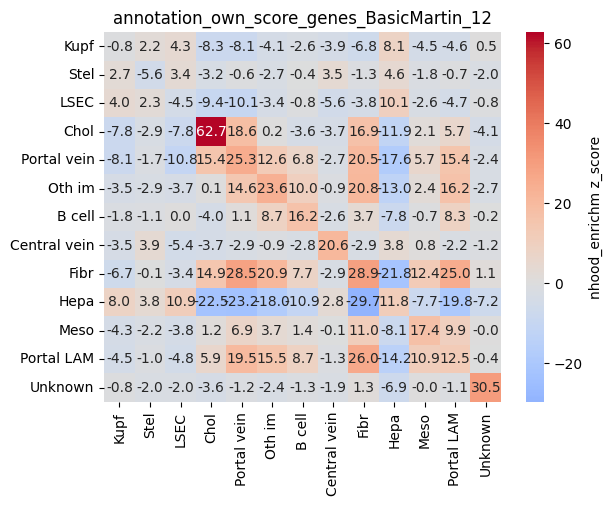

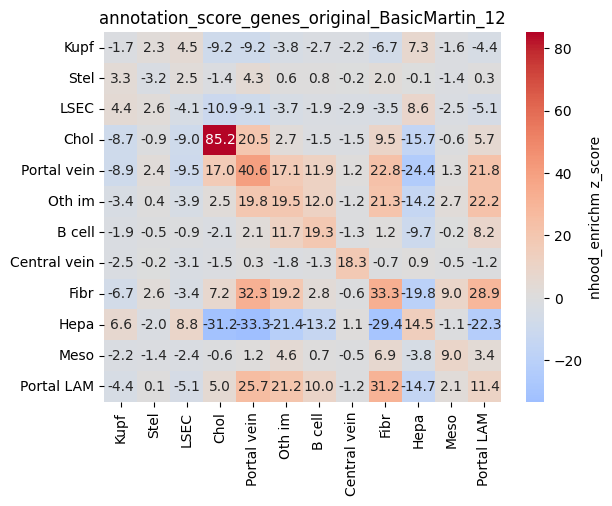

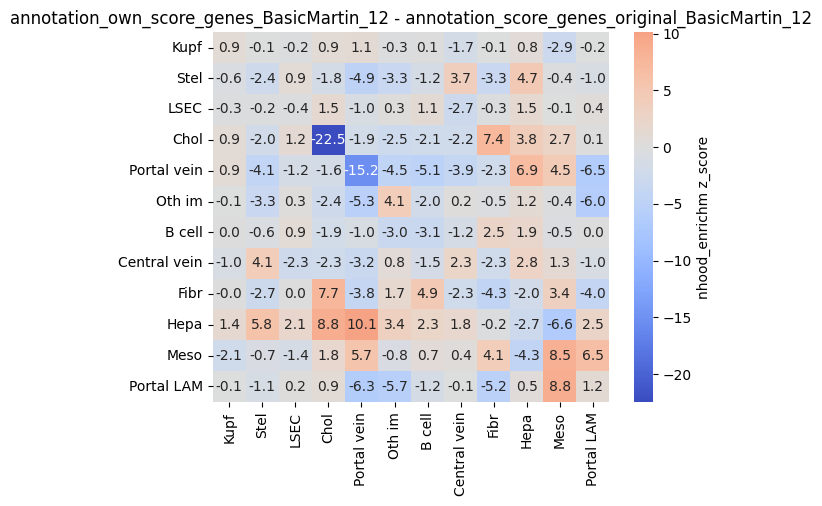

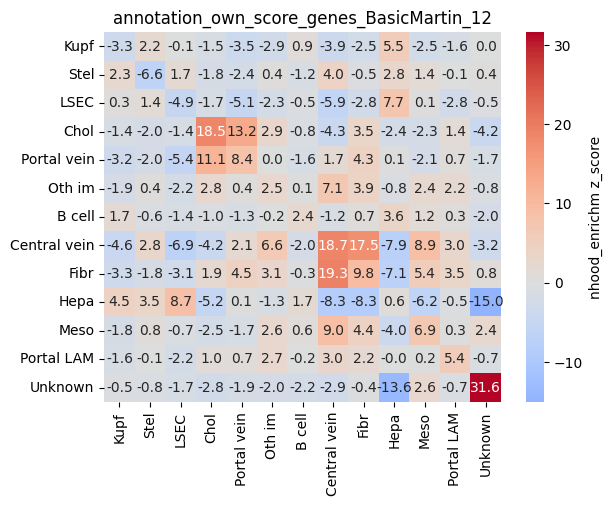

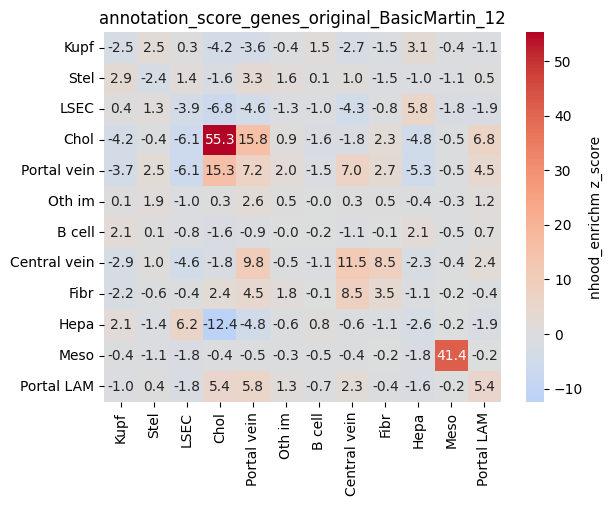

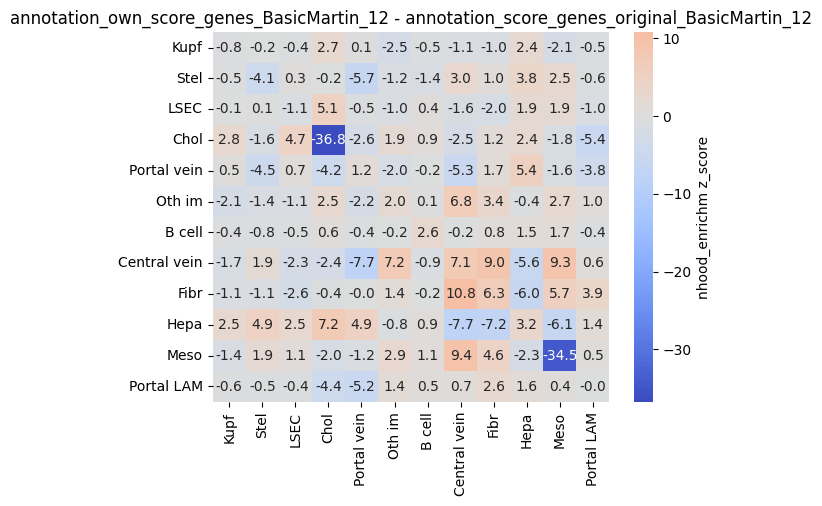

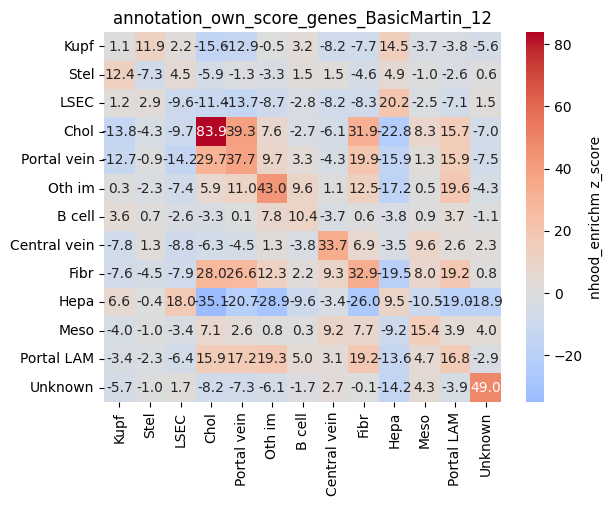

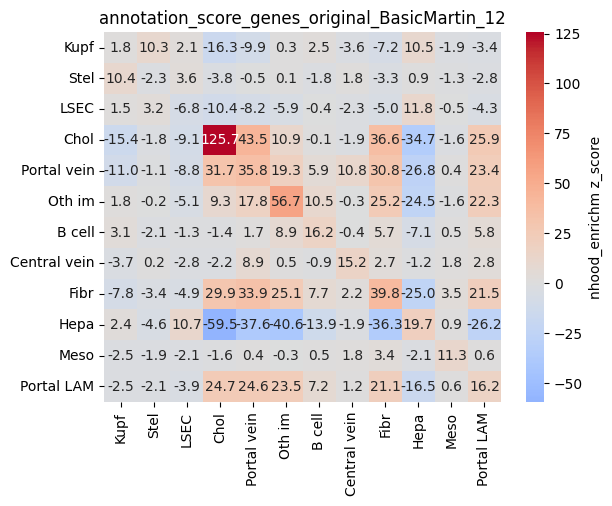

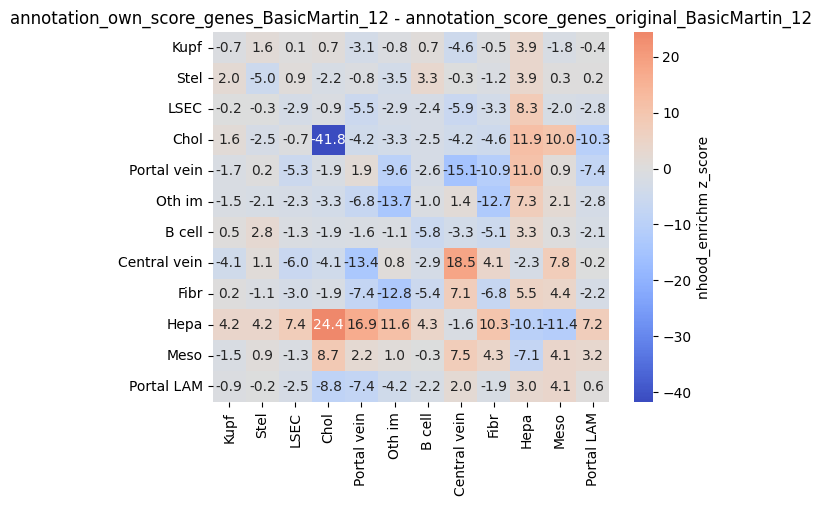

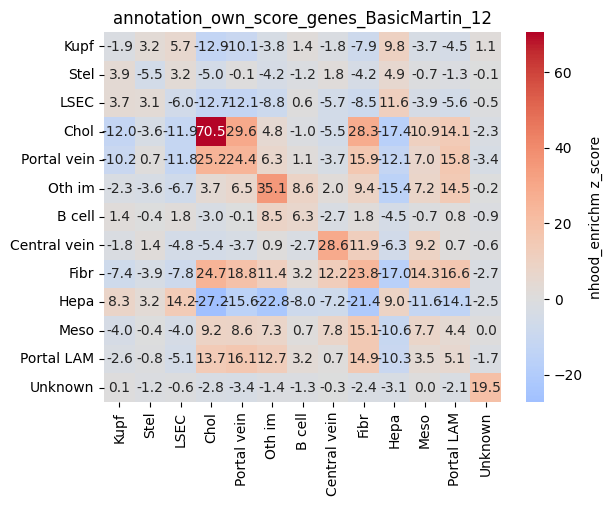

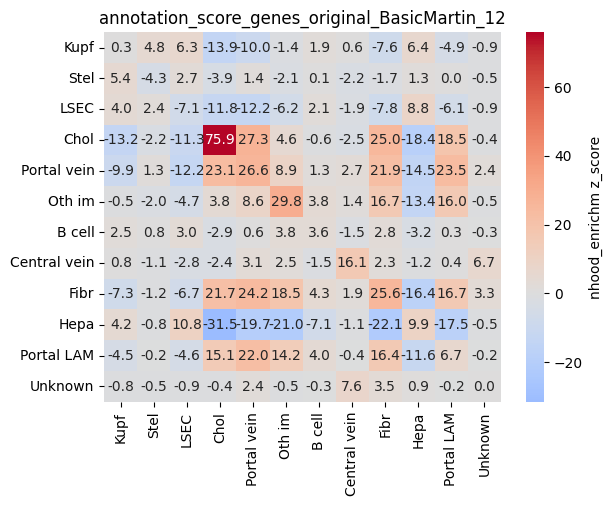

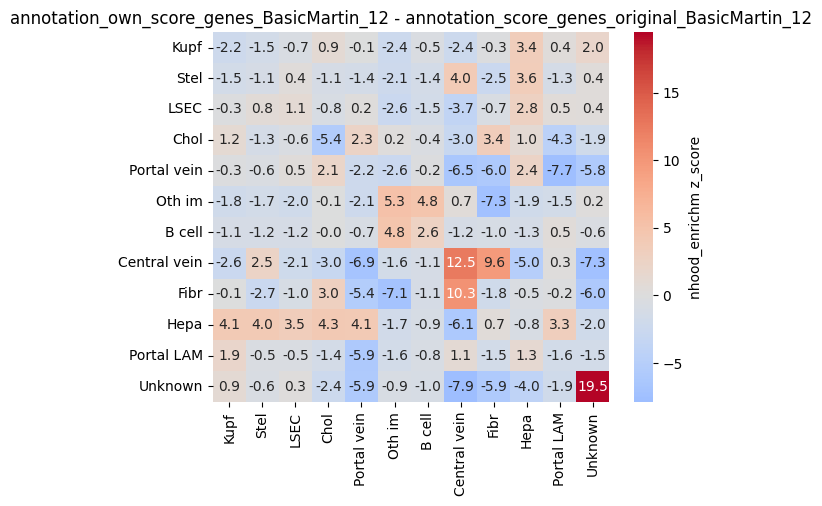

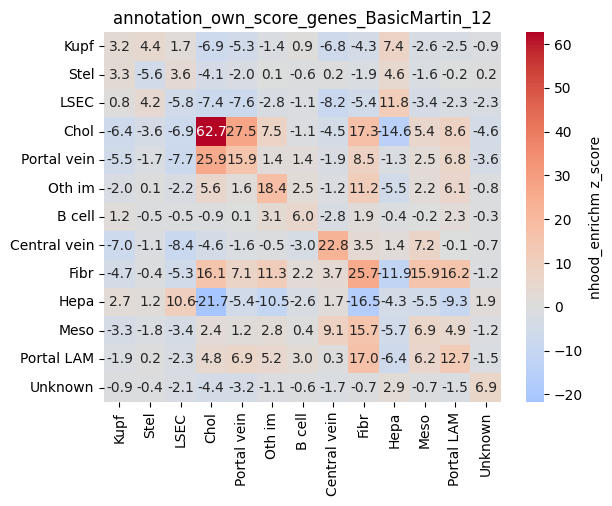

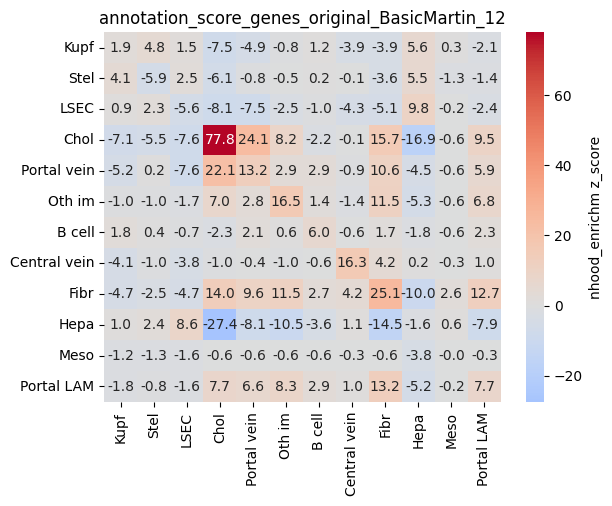

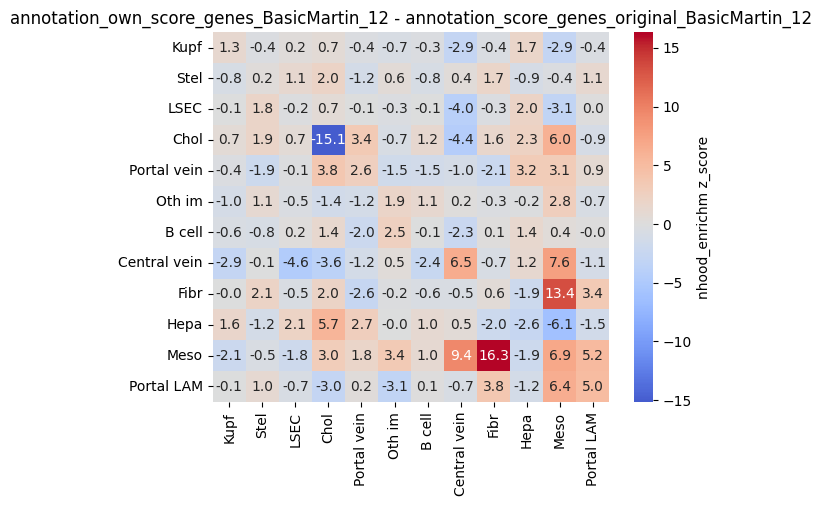

In [7]:
for i in range(len(anndata_objects)):
    print(samples[i])
    anno1_co_oc,anno2_co_oc,diff_co_oc = compare_co_occurrence(anndata_objects[i], annotation1, annotation2)
    anno1_co_ocs.append(anno1_co_oc)
    anno2_co_ocs.append(anno2_co_oc)
    diff_co_ocs.append(diff_co_oc)

Kupf  Stel  LSEC  Chol  Portal vein  Oth im  B cell  \
Kupf          -0.3   4.8   2.8  -9.0         -8.0    -2.6     0.8   
Stel           4.9  -6.1   3.3  -4.0         -1.3    -2.0    -0.4   
LSEC           2.0   2.8  -6.2  -8.5         -9.7    -5.2    -0.9   
Chol          -8.3  -3.3  -7.5  59.7         25.6     4.6    -1.8   
Portal vein   -7.9  -1.1 -10.0  21.4         22.3     6.0     2.2   
Oth im        -1.9  -1.7  -4.4   3.6          6.8    24.5     6.2   
B cell         1.2  -0.4  -0.5  -2.4         -0.0     5.6     8.3   
Central vein  -4.9   1.6  -6.9  -4.8         -2.1     1.5    -2.9   
Fibr          -5.9  -2.1  -5.5  17.1         17.1    11.8     3.0   
Hepa           6.0   2.3  12.5 -22.3        -13.0   -16.3    -5.9   
Meso          -3.5  -0.9  -3.1   3.5          3.5     3.4     0.7   
Portal LAM    -2.8  -0.8  -4.2   8.2         12.1    11.1     3.9   
Unknown       -1.6  -1.1  -0.9  -4.4         -3.4    -2.6    -1.4   

              Central vein  Fibr  Hepa  Meso  Portal LAM  Unknown  
Kupf                  -4.9  -5.8   9.1  -3.4        -3.4     -1.0  
Stel                   2.2  -2.5   4.4  -0.8        -1.0     -0.2  
LSEC                  -6.7  -5.8  12.3  -2.4        -4.5     -0.5  
Chol                  -4.8  19.6 -13.8   4.9         9.1     -4.4  
Portal vein           -2.2  13.8  -9.3   2.9        10.9     -3.7  
Oth im                 1.6  11.6 -10.4   2.9        11.7     -1.8  
B cell                -2.6   1.7  -2.6   0.1         3.1     -0.9  
Central vein          24.9   7.4  -2.5   7.1         0.8     -0.7  
Fibr                   8.3  24.2 -15.5  11.2        16.1     -0.2  
Hepa                  -2.9 -20.4   5.3  -8.3       -12.6     -8.4  
Meso                   7.0  10.8  -7.5  10.9         4.7      1.0  
Portal LAM             1.2  15.9  -8.9   5.1        10.5     -1.4  
Unknown               -0.8  -0.4  -7.0   1.2        -1.9     27.5

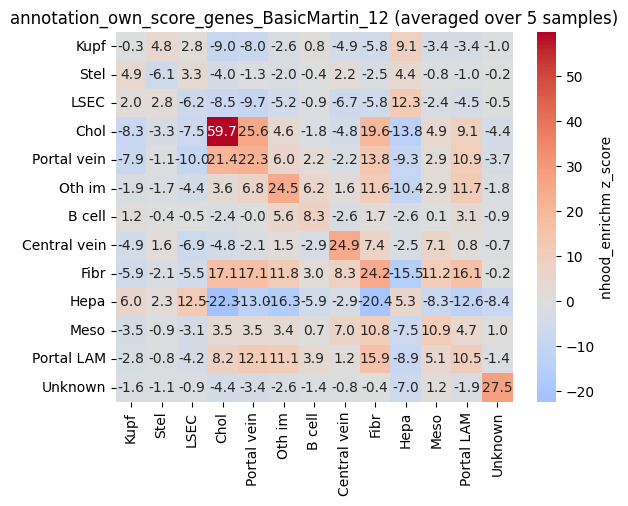

In [8]:
calculate_average_df(anno1_co_ocs,annotation1+' (averaged over 5 samples)')

Kupf  Stel  LSEC  Chol  Portal vein  Oth im  B cell  \
Kupf          -0.0   4.9   2.9 -10.2         -7.5    -1.2     0.9   
Stel           5.2  -3.6   2.6  -3.4          1.5    -0.1    -0.1   
LSEC           2.2   2.4  -5.5  -9.6         -8.3    -3.9    -0.4   
Chol          -9.7  -2.2  -8.6  84.0         26.2     5.5    -1.2   
Portal vein   -7.8   1.0  -8.9  21.8         24.7    10.0     4.1   
Oth im        -0.6  -0.2  -3.3   4.6         10.3    24.6     5.5   
B cell         1.5  -0.3  -0.1  -2.1          1.1     5.0     9.0   
Central vein  -2.5  -0.2  -3.4  -1.8          4.3    -0.1    -1.1   
Fibr          -5.7  -1.0  -4.1  15.0         20.9    15.2     3.5   
Hepa           3.2  -1.3   9.0 -32.4        -20.7   -18.8    -7.4   
Portal LAM    -2.9  -0.5  -3.4  11.6         17.0    13.7     4.7   

              Central vein  Fibr  Hepa  Portal LAM  
Kupf                  -2.4  -5.4   6.6        -3.2  
Stel                   0.0  -1.6   1.3        -0.7  
LSEC                  -3.1  -4.4   9.0        -4.0  
Chol                  -1.5  17.8 -18.1        13.3  
Portal vein            4.2  17.7 -15.1        15.8  
Oth im                -0.2  15.0 -11.6        13.7  
B cell                -1.0   2.2  -3.9         3.5  
Central vein          15.5   3.4  -0.7         1.1  
Fibr                   3.2  25.5 -14.5        15.9  
Hepa                  -0.3 -20.7   8.0       -15.1  
Portal LAM             0.6  16.3  -9.9         9.5

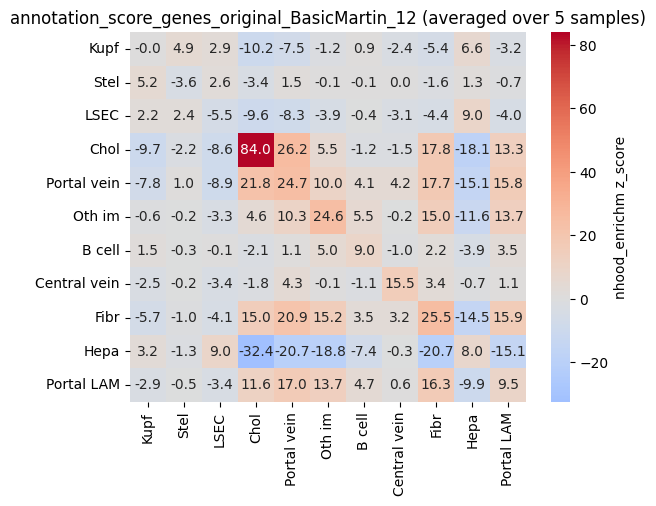

In [9]:
calculate_average_df(anno2_co_ocs,annotation2+' (averaged over 5 samples)')

Kupf  Stel  LSEC  Chol  Portal vein  Oth im  B cell  \
Kupf          -0.3  -0.1  -0.2   1.2         -0.5    -1.3    -0.1   
Stel          -0.3  -2.5   0.7  -0.6         -2.8    -1.9    -0.3   
LSEC          -0.2   0.4  -0.7   1.1         -1.4    -1.3    -0.5   
Chol           1.4  -1.1   1.1 -24.3         -0.6    -0.9    -0.6   
Portal vein   -0.2  -2.2  -1.1  -0.4         -2.3    -4.0    -1.9   
Oth im        -1.3  -1.5  -1.1  -1.0         -3.5    -0.1     0.6   
B cell        -0.3  -0.1  -0.4  -0.4         -1.1     0.6    -0.7   
Central vein  -2.4   1.9  -3.5  -3.1         -6.5     1.5    -1.8   
Fibr          -0.2  -1.1  -1.4   2.1         -3.8    -3.4    -0.5   
Hepa           2.8   3.5   3.5  10.1          7.8     2.5     1.5   
Portal LAM     0.0  -0.3  -0.8  -3.3         -4.9    -2.6    -0.7   

              Central vein  Fibr  Hepa  Portal LAM  
Kupf                  -2.5  -0.5   2.5        -0.2  
Stel                   2.2  -0.9   3.0        -0.3  
LSEC                  -3.6  -1.3   3.3        -0.6  
Chol                  -3.3   1.8   4.3        -4.2  
Portal vein           -6.3  -3.9   5.8        -4.9  
Oth im                 1.8  -3.5   1.2        -2.0  
B cell                -1.6  -0.5   1.4        -0.4  
Central vein           9.4   4.0  -1.8        -0.3  
Fibr                   5.1  -1.2  -1.0         0.2  
Hepa                  -2.6   0.3  -2.6         2.6  
Portal LAM             0.6  -0.5   1.0         1.0

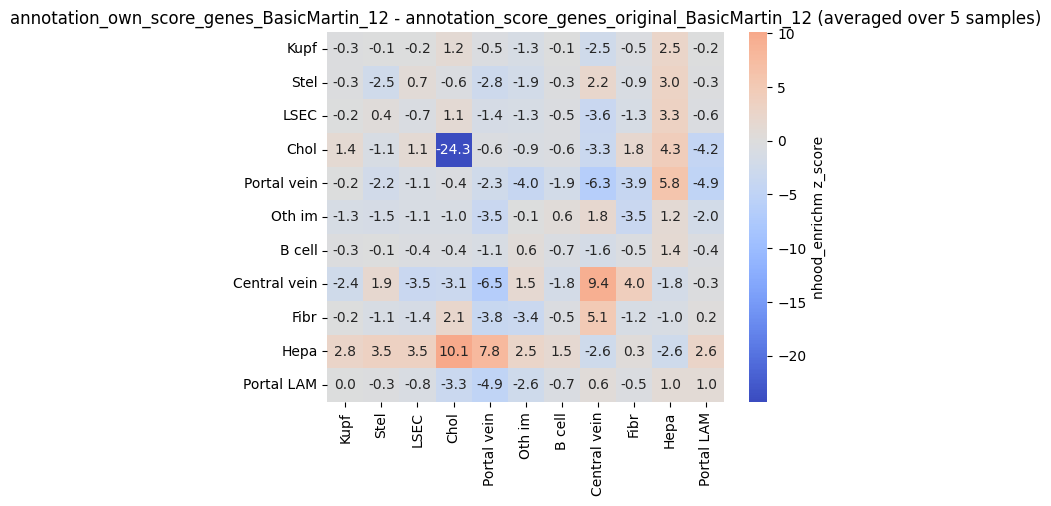

In [10]:
calculate_average_df(diff_co_ocs,annotation1 + ' - ' + annotation2 + ' (averaged over 5 samples)')